Please copy the notebook to your drive and write your code in it.

# New section

Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd

Read Dataset from csv file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# iris= pd.read_csv("Iris.csv")
path = "/content/drive/MyDrive/priject1/lab4/Iris.csv"
iris = pd.read_csv(path)

Preview dataset

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Declare feature vector and target variable

In [5]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

In [6]:
target = ["Species"]

Replace categorical data with numbers

In [7]:
df = iris.replace("Iris-setosa", 1, regex=True)
df = df.replace("Iris-versicolor", 2, regex=True)
df = df.replace("Iris-virginica", 3, regex=True)

Split data into train and test sets

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop("Species", axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Base estimator(Decision Tree classifier) : a weak learner with max_depth=2

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6333333333333333


Fit weak classifier

In [10]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model,X_train,y_train,scoring=['accuracy'],cv=5)

Calculate the accuracy by the weak learner

In [11]:
scores['test_accuracy'].mean()

0.6583333333333333

Build the AdaBoost model with the the above decision tree and by increasing the number of trees from 1 to 5 with a step of 1 in the lines:

Hint:   
estimators = list(range(1, 5, 1))
for n_est in estimators:



In [12]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

def get_models():
    models = dict()
    estimators = list(range(1, 5, 1))
    for n_est in estimators:
        models[str(n_est)] = AdaBoostClassifier(n_estimators = n_est, learning_rate=1, base_estimator = model, random_state=0)
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(mean(scores))
    names.append(name)
    print('>%s %.3f' % (name, mean(scores)))

>1 0.667
>2 0.997
>3 0.997
>4 0.997


Plot the model performance

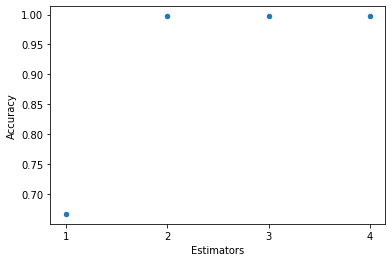

In [13]:
result = pd.DataFrame(list(zip(names, results)),columns =['Estimators', 'Accuracy'])
result.plot(x="Estimators", y="Accuracy", kind='scatter');


#Bayes Classfication

# New Section

Import modules

In [14]:
from sklearn.naive_bayes import GaussianNB

Naive Bayes algorithm using 5-fold cross validation 

In [15]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores1 = cross_validate(gnb,X_train,y_train,scoring=['accuracy'],cv=5)
y_pred = gnb.predict(X_test)

In [16]:
scores1['test_accuracy'].mean()

0.9916666666666668

Plot the ROC AUC curve

In [17]:
from sklearn.preprocessing import label_binarize
y_test1 = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test1.shape[1]
y_pred1 = label_binarize(y_pred, classes=[0, 1, 2])

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if __name__ == '__main__':


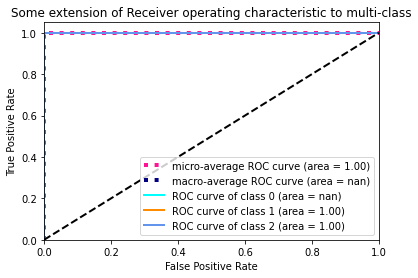

In [19]:

from itertools import cycle
import matplotlib.pyplot as plt
lw=2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Use linear discriminant function to compute accuracy

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [22]:
clf.score(X_test, y_test)

1.0

Bayes risk

[Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Adaboost Explaination](https://https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)

[Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[Naive Bayes](https://https://scikit-learn.org/stable/modules/naive_bayes.html)


[Discriminant function analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)





